In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def reading_data(filepath):
    df = pd.read_csv(filepath)
    df1 = df.iloc[:,0:5]
    date = [datetime.datetime(Y,M,D) for Y,M,D in zip(df1['Year'],df1['Month'],df1['Day'])]
    df1["Date"] = pd.to_datetime(date)
    df1.index = df1.Date
    df1 = df1.drop(["Year","Month","Day","High Temp (F)","Date"],axis=1)
    return df1

In [ ]:
def scaling_data(df):
    df_scaled = pd.DataFrame(index=df.index)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_scaled['x(t)'] = scaler.fit_transform(df.iloc[:,0:].values)
    return df_scaled,scaler

In [ ]:
def lagging_data(df,lag=1):
    df_lagged = pd.DataFrame(index=df.index)
    for i in range(lag,0,-1):
        df_shifted = df.shift(i)
        df_lagged["x(t-"+str(i)+")"]= df["x(t)"]
    df_lagged["y=x(t)"] = df["x(t)"]   
    df_lagged = df_lagged.iloc[lag:]
    return df_lagged

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Notebooks for course/Recurrent Neural Network/Boston weather_clean.csv'

In [ ]:
df = reading_data(filepath)
df_scaled,scaler = scaling_data(df)
lag = 30
df_lagged = lagging_data(df_scaled,lag)

#scaling of data into training and testing data
df_training = df_lagged["2008-01-06":"2016-01-01"]
df_testing = df_lagged["2016-01-01":]

In [ ]:
df.head()

,Avg Temp (F)
Date,
2008-01-01,34
2008-01-02,22
2008-01-03,11
2008-01-04,20
2008-01-05,35


In [ ]:
df1 = pd.DataFrame(index=df.index)

In [ ]:
df_shifted = df.shift(1)

In [ ]:
df_shifted.head()

,Avg Temp (F)
Date,
2008-01-01,NaN
2008-01-02,34.0
2008-01-03,22.0
2008-01-04,11.0
2008-01-05,20.0


In [ ]:
df_shifted1 = df.shift(2)

In [ ]:
new_df = pd.concat([df_shifted, df_shifted1], axis=1)

In [ ]:
new_df.head()

,Avg Temp (F),Avg Temp (F)
Date,,
2008-01-01,NaN,NaN
2008-01-02,34.0,NaN
2008-01-03,22.0,34.0
2008-01-04,11.0,22.0
2008-01-05,20.0,11.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#splitting the data into features and targets
x_train = df_training.drop("y=x(t)",axis=1).values
y_train = df_training["y=x(t)"].values
x_test = df_testing.drop("y=x(t)",axis=1).values
y_test = df_testing["y=x(t)"].values

In [ ]:
# number of samples in training data
batch_size_training = x_train.shape[0]
# number of samples in testing data
batch_size_testing = x_test.shape[0]
# number of timesteps which is equal to lag and that is same for both training and testing data
timesteps = x_train.shape[1]
# input dimension which is number of features per timestep
input_dim = 1


In [ ]:
# reshaping input data into 3D tensor with shape (batch_size,timesteps,input_dim)
x_train = x_train.reshape(batch_size_training,timesteps,input_dim)
x_test = x_test.reshape(batch_size_testing,timesteps,input_dim)


In [ ]:
print("x_train shape is {0} and x_test shape is {1}.".format(x_train.shape,x_test.shape))
print("y_train shape is {0} and y_test shape is {1}.".format(y_train.shape,y_test.shape))

x_train shape is (2893, 30, 1) and x_test shape is (827, 30, 1).
y_train shape is (2893,) and y_test shape is (827,).


In [ ]:
batch_size = 20
hidden_size_l1 = 100
hidden_size_l2 = 100

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(hidden_size_l1,activation='tanh',return_sequences=True,stateful=True,batch_input_shape=(1,timesteps,input_dim)))
model.add(tf.keras.layers.LSTM(hidden_size_l2,activation='tanh',return_sequences=False,stateful=True))
model.add(tf.keras.layers.Dense(1,activation='tanh'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 30, 100)              40800     
_________________________________________________________________
lstm_5 (LSTM)                (1, 100)                  80400     
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=1)

Epoch 1/10
2603/2603 [==============================] - 45s 17ms/step - loss: 0.0014 - val_loss: 4.6539e-04
Epoch 2/10
2603/2603 [==============================] - 40s 15ms/step - loss: 4.4545e-04 - val_loss: 9.0552e-05
Epoch 3/10
2603/2603 [==============================] - 40s 15ms/step - loss: 2.9615e-04 - val_loss: 7.1334e-05
Epoch 4/10
2603/2603 [==============================] - 40s 16ms/step - loss: 2.2595e-04 - val_loss: 2.3709e-05
Epoch 5/10
2603/2603 [==============================] - 40s 15ms/step - loss: 1.8493e-04 - val_loss: 5.6815e-05
Epoch 6/10
2603/2603 [==============================] - 41s 16ms/step - loss: 1.5703e-04 - val_loss: 4.2654e-04
Epoch 7/10
2603/2603 [==============================] - 41s 16ms/step - loss: 1.3482e-04 - val_loss: 5.2045e-05
Epoch 8/10
2603/2603 [==============================] - 41s 16ms/step - loss: 1.2165e-04 - val_loss: 2.8959e-05
Epoch 9/10
2603/2603 [==============================] - 41s 16ms/step - loss: 1.0982e-04 - val_loss: 6.8849e

In [ ]:
model.evaluate(x_test,y_test,batch_size=1)

827/827 [==============================] - 4s 4ms/step - loss: 2.9197e-05


2.9197030016803183e-05

In [ ]:
y_pred = model.predict(x_test,batch_size=1)

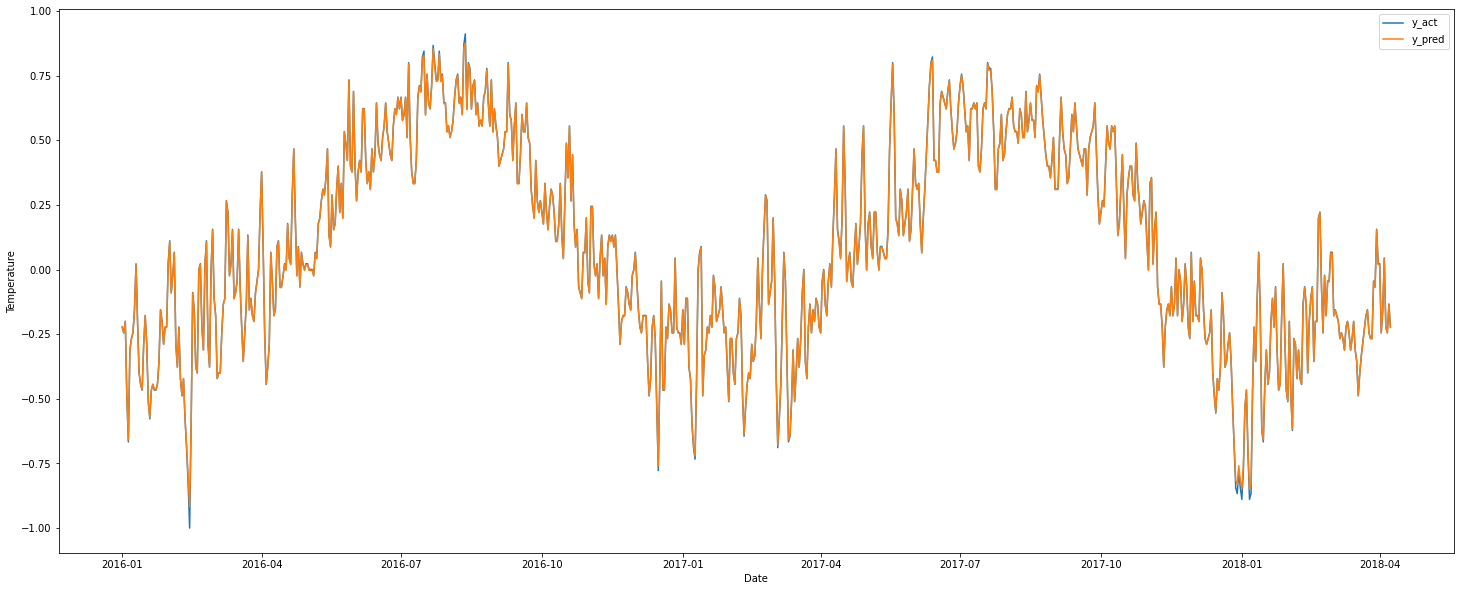

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(df_testing.index,y_test,label='y_act')
plt.plot(df_testing.index,y_pred,label='y_pred')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

In [ ]:
temp_act = scaler.inverse_transform(y_test.reshape(-1,1))
temp_pred = scaler.inverse_transform(y_pred.reshape(-1,1))

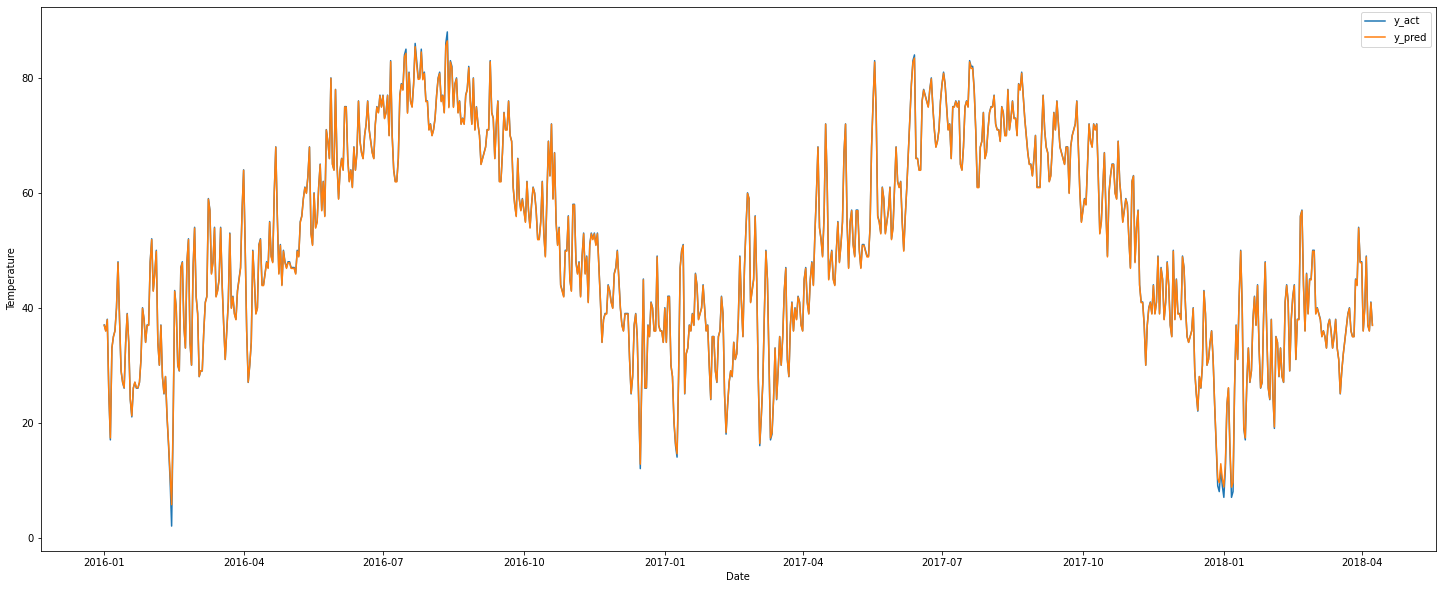

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(df_testing.index,temp_act,label='y_act')
plt.plot(df_testing.index,temp_pred,label='y_pred')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

In [ ]:
def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true))) 

In [ ]:
rmse(temp_act, temp_pred)

0.2431540582751714

In [ ]:
model.save("lstm_pred.h5")